# Survival Function and Hazard Rate

When analyzing survival data, it is often useful to plot the percentage of a population that is still alive at every age. This can be seen as an approximation of the survival function, which is the probability that the time of death $T$ of a member of the population will be later than the current time $t$:
$$
S(t) = P(T > t).
$$

## Basic properties of the survival function

Since it is a probability, it can only take values in the interval $[0, 1]$. Clearly, the value $S(0) = 1$, since at time 0 no one has had the opportunity to die yet, and similarly one typically expects the function to tend to 0 as time goes to infinity, unless part of the population never dies.

## Relation to other quantities

The survival function is just 1 - the cumulative density function $F(t)$:
$$
S(t) = P(T > t) = 1 - P(T \leq t) = 1 - F(t).
$$
From this, one can deduce its relationship to other quantities, such as the probability density function $f(t)$:
$$
f(t) = \lim_{\Delta t \rightarrow 0}\frac{P(t < T < t + \Delta t)}{\Delta t}= \frac{d F}{dt} = -\frac{dS}{dt} \qquad \leftrightarrow\qquad
S(t) = \int_0^t ds\, f(s)
$$

We can make this more intuitive with a picture:

In [19]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


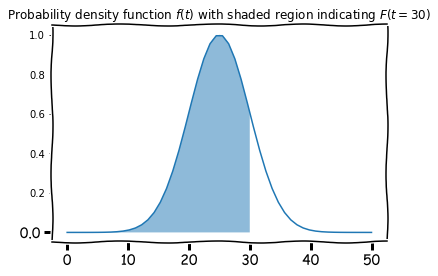

In [61]:
plt.xkcd()
x = linspace(0, 50)
y = exp(-(x-25) ** 2 / 50)
plt.plot(x, y)
x2 = linspace(0, 30)
y2 = exp(-(x2-25)**2/50)
plt.fill_between(x2, y2, alpha=0.5)
plt.title("Probability density function $f(t)$ with shaded region indicating $F(t=30)$");

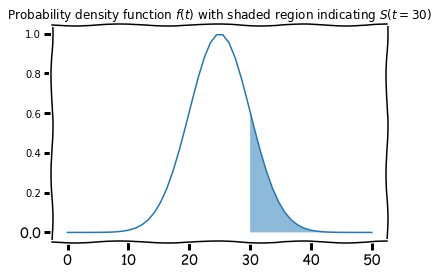

In [62]:
plt.xkcd()
x = linspace(0, 50)
y = exp(-(x-25) ** 2 / 50)
plt.plot(x, y)
x2 = linspace(30, 50)
y2 = exp(-(x2-25)**2/50)
plt.fill_between(x2, y2, alpha=0.5)
plt.title("Probability density function $f(t)$ with shaded region indicating $S(t=30)$");

## Relationship between survival function and hazard rate

Another quantity of interest is the hazard rate, which is defined as
$$h(t) = \frac{P(T < t + \Delta t | T > t)}{\Delta t},$$
which colloquially means: _"the probability density of dying just after time $t$, given that you have already survived up until time $t$."_

This is related to the probability density function and survival function by:
$$h(t) = \frac{f(t)}{S(t)} = -\frac{1}{S(t)}\frac{dS(t)}{dt}.
$$
We can invert this relationship:
$$
\int_0^t ds\; h(s) = -\int_0^tds\; \frac{1}{S(s)}\frac{dS(s)}{ds} = -\int_{S(0)}^{S(t)}dS\;\frac{1}{S}
= \log S(0) - \log S(t) = -\log S(t),
$$
so that
$$S(t) = e^{-\int_0^tds\;h(s)}.$$

It is important to note that the probaility density function, survival function and hazard rate are interchangable in that if you know one of them, you can deduce the form of the others.

In the following three sections, we will show three examples of hazard rate functions, and their corresponding survival functions. The important difference will be whether the hazard rate increases, decreases, or is constant with time.

## Constant hazard: exponential survival function

When the hazard rate is constant, $h(t) = \lambda$, the survival function is a simple exponential:
$$
S(t) = e^{-\int_0^t ds\,\lambda} = e^{-\lambda\,t}
$$

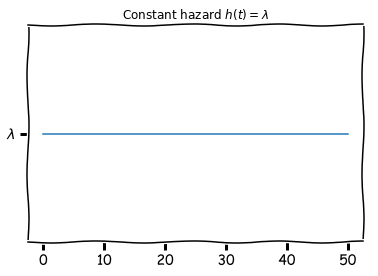

In [65]:
plt.xkcd()  # Yes...
plt.plot(linspace(0, 50), [1]*50)
plt.yticks([1],['$\lambda$'])
plt.title('Constant hazard $h(t)=\lambda$');

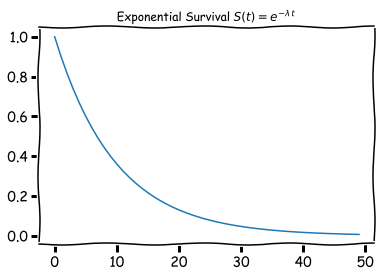

In [66]:
plt.xkcd()  # Yes...
plt.plot(exp(-0.05*linspace(0, 100)))
plt.title('Exponential Survival $S(t) = e^{-\lambda\,t}$');

## Linearly Increasing Hazard

With a linearly increasing hazard rate $h(t) = \lambda t$, we have the following survival function:
$$
S(t) = e^{-\int_0^tds\,\lambda\,s} = e^{-\frac{\lambda}{2}t^2}
$$

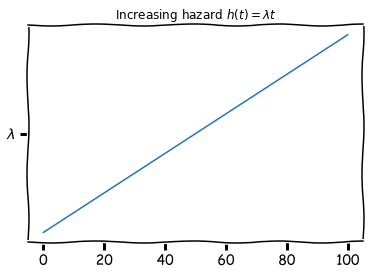

In [67]:
plt.xkcd()  # Yes...
plt.plot(linspace(0, 100), linspace(0, 100))
plt.yticks([50],['$\lambda$'])
plt.title('Increasing hazard $h(t)=\lambda t$');

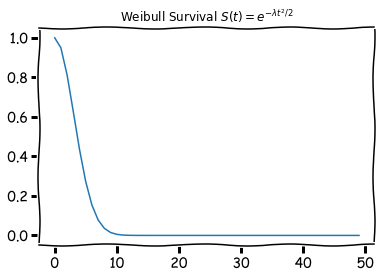

In [82]:
plt.xkcd()  # Yes...
plt.plot(exp(-0.05*(linspace(0, 50)**2)))
plt.title('Weibull Survival $S(t) = e^{-\lambda t^2/2}$');

## Decreasing Hazard

With a decreasing hazard rate  $h(t)=\lambda/\sqrt{t}$, we have the following survival function:
$$
S(t) = e^{-\int_0^tds\frac{\lambda}{\sqrt{s}}} = e^{-\frac{\lambda}{2}\sqrt{t}}
$$

/Users/marianne/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


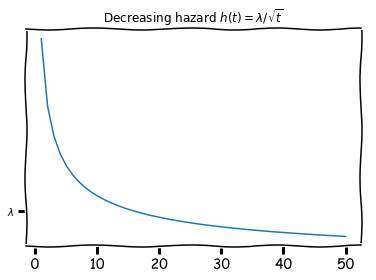

In [79]:
plt.xkcd()
plt.plot(linspace(0, 50), 1 / sqrt(linspace(0, 50)))
plt.yticks([.25],['$\lambda$'])
plt.title('Decreasing hazard $h(t) = \lambda / \sqrt{t}$');

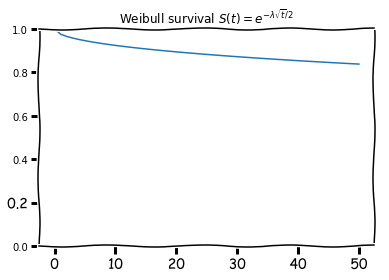

In [88]:
plt.xkcd()
plt.plot(linspace(0, 50), exp(-(0.05/2)*sqrt(linspace(0, 50))))
# plt.yticks([.25],['$\lambda$'])
plt.ylim(0, 1)
plt.title('Weibull survival $S(t) = e^{-\lambda\sqrt{t} / 2}$');